In [1]:
import numpy as np
import numpy.fft as fft
from scipy import signal as sg
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append("/home/jovyan/")

from imtools import load_img, show_img
from sigtools import *

img = load_img('oriental_pearl.jpg')

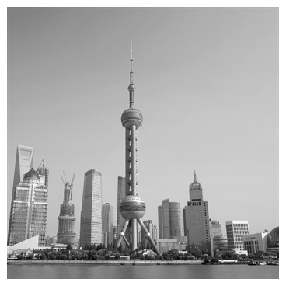

In [2]:
show_img(img)

In [3]:
def lowpass_kernel(cutoff=40, transition_band=10, sample_frequency=500):
    """
    Generate a n x n matrix with a gaussian centered on it.
    The distributions standard dev is std. If normalised, its volume equals 1.
    """
    lowpass_1d = lowpass(cutoff, transition_band, sample_frequency)
    lowpass_2d = np.outer(lowpass_1d, lowpass_1d)

    return lowpass_2d

Filter Length = 37


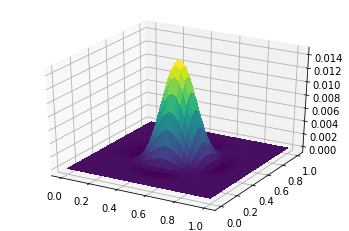

In [4]:
kernel = lowpass_kernel(60, 55)
_, size = kernel.shape
X, Y = np.meshgrid(np.linspace(0,1,size), np.linspace(0,1,size))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, kernel, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, aa=False)

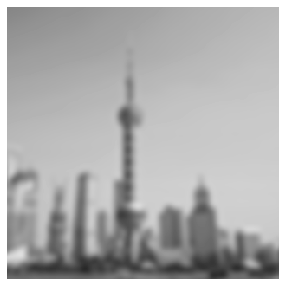

In [5]:
filtered_img = sg.convolve(kernel, img, 'valid')

show_img(filtered_img)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


(-0.5, 349.5, 349.5, -0.5)

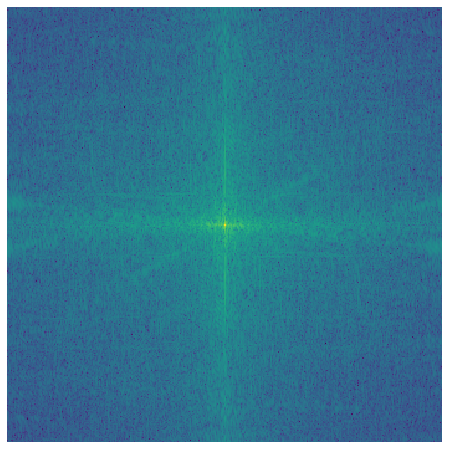

In [13]:
fourier_raw = fft.fft2(img)
fourier_img = fft.fftshift(fourier_raw)
show_img((20*np.log10(0.1 + fourier_img)).astype(int), color=True) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


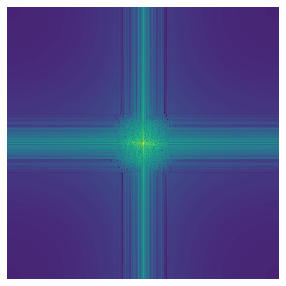

In [19]:
fourier_raw = fft.fft2(filtered_img)
fourier_img = fft.fftshift(fourier_raw)
show_img((20*np.log10(0.1 + fourier_img)).astype(int), color=True) 
